In [1]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, LearningRateScheduler
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


In [3]:
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Train images shape: (50000, 32, 32, 3)
Train labels shape: (50000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

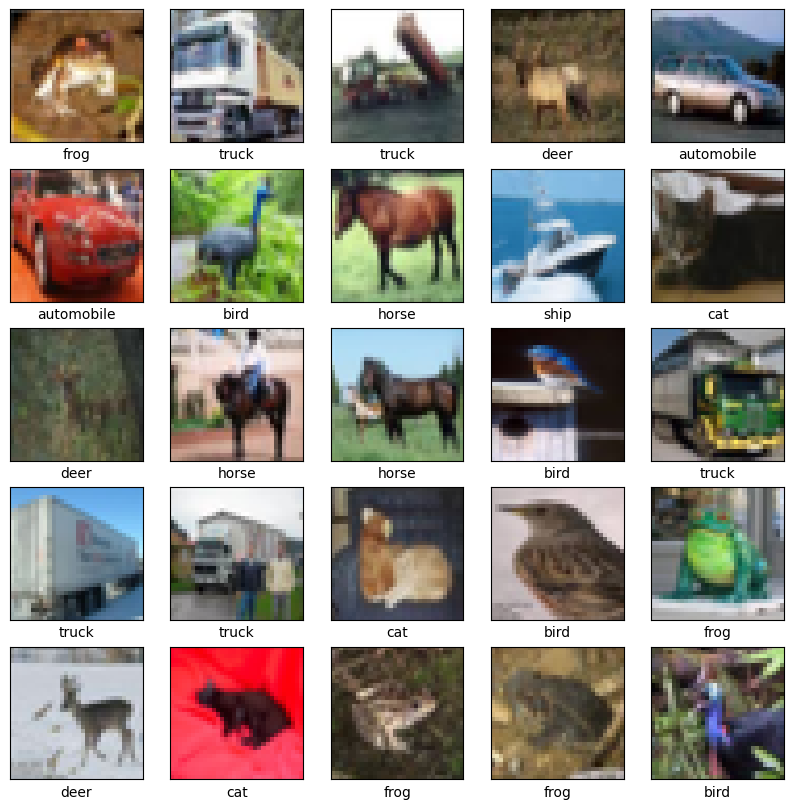

In [5]:
plt.figure(figsize=[10, 10])
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [6]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255


In [7]:
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [8]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [9]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

In [11]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
learning_rate_scheduler = LearningRateScheduler(lambda epoch: 0.001 * np.exp(-epoch / 10))

In [12]:
history = model.fit(datagen.flow(train_images, train_labels, batch_size=64),
                    epochs=100,
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stopping, learning_rate_scheduler])

Epoch 1/100


782/782 [==============================] - 79s 96ms/step - loss: 4.2172 - accuracy: 0.3734 - val_loss: 2.1732 - val_accuracy: 0.4968 - lr: 0.0010
Epoch 2/100
782/782 [==============================] - 75s 96ms/step - loss: 2.0833 - accuracy: 0.4857 - val_loss: 2.4657 - val_accuracy: 0.4394 - lr: 9.0484e-04
Epoch 3/100
782/782 [==============================] - 73s 94ms/step - loss: 1.9117 - accuracy: 0.5406 - val_loss: 2.3107 - val_accuracy: 0.4573 - lr: 8.1873e-04
Epoch 4/100
782/782 [==============================] - 56s 72ms/step - loss: 1.8281 - accuracy: 0.5762 - val_loss: 1.9814 - val_accuracy: 0.5809 - lr: 7.4082e-04
Epoch 5/100
782/782 [==============================] - 55s 70ms/step - loss: 1.7590 - accuracy: 0.6001 - val_loss: 2.1255 - val_accuracy: 0.5515 - lr: 6.7032e-04
Epoch 6/100
782/782 [==============================] - 56s 72ms/step - loss: 1.6778 - accuracy: 0.6191 - val_loss: 1.7096 - val_accuracy: 0.6204 - lr: 6.0653e-04
Epoch 7/100
782/782 [=========

In [13]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                        

In [14]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)

# Print the test accuracy
print("Test Accuracy:", test_accuracy)

313/313 - 4s - loss: 0.6459 - accuracy: 0.8031 - 4s/epoch - 13ms/step
Test Accuracy: 0.8030999898910522


Text(0.5, 1.0, 'Loss Curves')

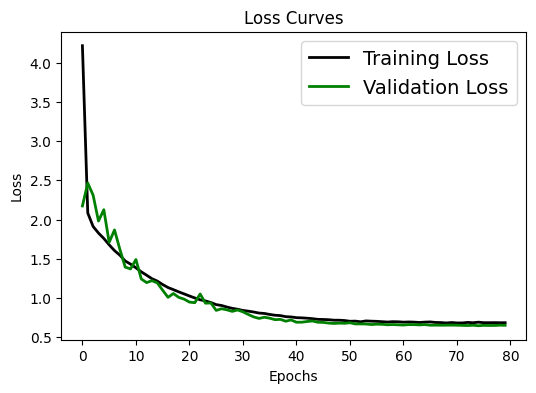

In [15]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

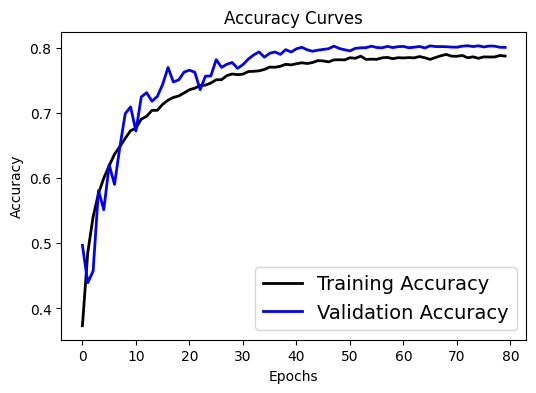

In [16]:
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

In [17]:
pred = model.predict(test_images)
print(pred)

# Converting the predictions into label index 
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

313/313 [==============================] - 4s 12ms/step
[[1.8961618e-05 4.2849602e-04 1.5568697e-04 ... 5.7030618e-05
  5.6683406e-04 2.1109534e-04]
 [9.9257086e-06 8.4140077e-03 2.9306721e-08 ... 1.6991499e-09
  9.9156183e-01 1.4133560e-05]
 [5.9663369e-05 1.5627794e-02 3.2010234e-07 ... 1.2308992e-07
  9.8401678e-01 2.9314117e-04]
 ...
 [1.1476724e-07 1.3460186e-07 1.1666415e-03 ... 5.8221805e-04
  9.2859664e-06 1.1528120e-06]
 [2.7944245e-05 9.9969757e-01 1.5122775e-06 ... 4.9738009e-07
  9.2928012e-06 2.5130715e-04]
 [2.2235376e-06 4.8798206e-06 3.4986813e-05 ... 9.9396038e-01
  9.4176151e-08 3.7668235e-07]]
[3 8 8 ... 5 1 7]


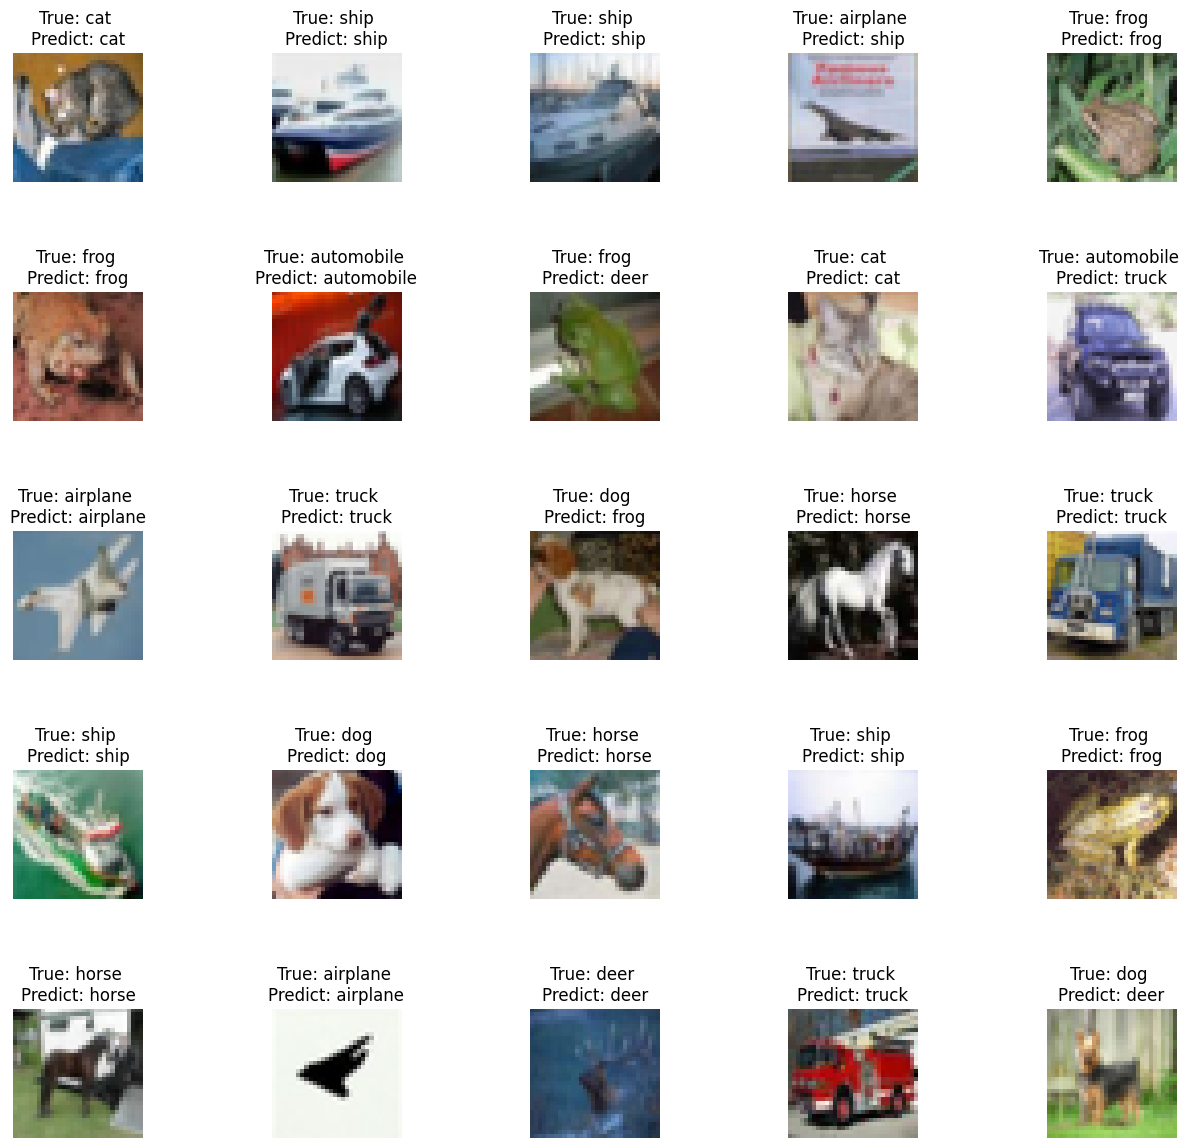

In [18]:
fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()


for i in np.arange(0, 25):
    axes[i].imshow(test_images[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(test_labels[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

In [19]:
model_json=model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [20]:
from tensorflow.keras.models import model_from_json
json_file=open('model.json','r')
loaded_model_json=json_file.read()
json_file.close()
model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                        